<a href="https://colab.research.google.com/github/Anshuldogra001/Stock_Market_Capestone_Project/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
! pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import pandas as pd
import plotly.express as px
from prophet import Prophet
import yfinance as yf
import plotly.io as pio
pio.renderers.default = 'colab'
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [70]:
Tesla=yf.Ticker("TSLA")

In [71]:
df=Tesla.history(period="max")

In [72]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3236 non-null   datetime64[ns]
 1   Open          3236 non-null   float64       
 2   High          3236 non-null   float64       
 3   Low           3236 non-null   float64       
 4   Close         3236 non-null   float64       
 5   Volume        3236 non-null   int64         
 6   Dividends     3236 non-null   float64       
 7   Stock Splits  3236 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 202.4 KB


In [74]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3231,2023-05-01,163.169998,163.279999,158.830002,161.830002,109015000,0.0,0.0
3232,2023-05-02,161.880005,165.490005,158.929993,160.309998,128259700,0.0,0.0
3233,2023-05-03,160.009995,165.000000,159.910004,160.610001,119728000,0.0,0.0
3234,2023-05-04,162.710007,162.949997,159.649994,161.199997,95108500,0.0,0.0


In [75]:
px.area(df, x="Date", y="Close")

In [76]:
px.line(df, x="Date", y="Close")

In [77]:
px.area(df, x="Date", y="Volume")

In [78]:
px.bar(df,y="Volume")

In [79]:
px.box(df,y="Close")

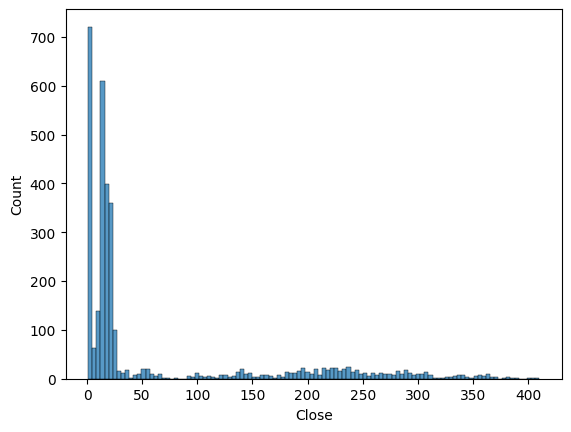

In [80]:
import seaborn as sns
# Generate histogram of a specific column
sns.histplot(data=df, x='Close')
plt.show()

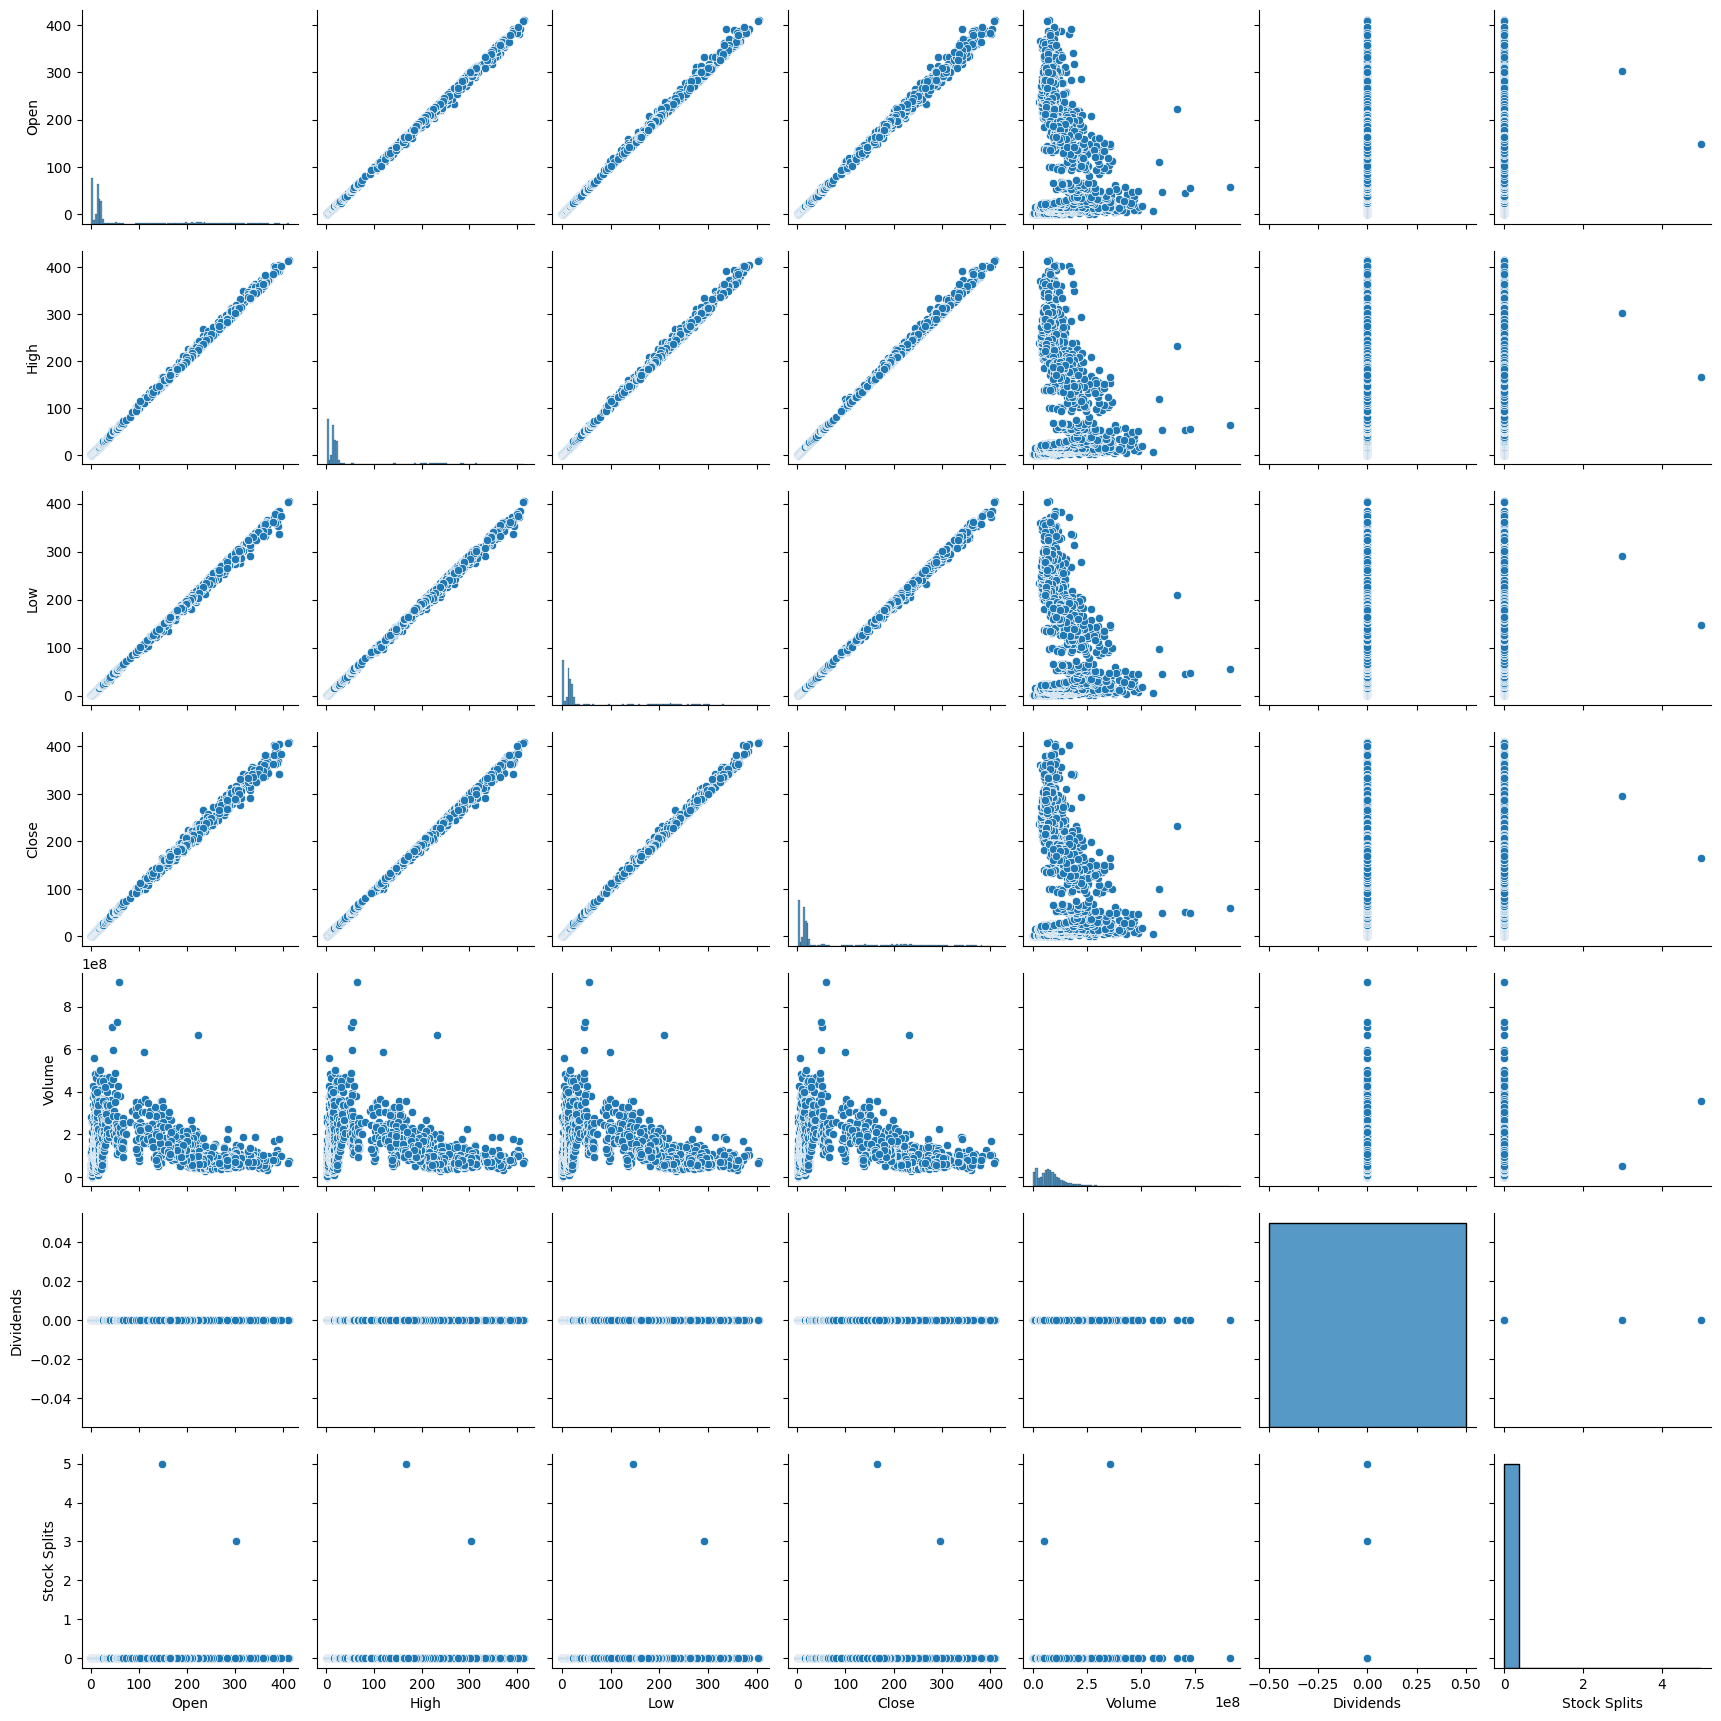

In [81]:
# Generate pairplot of all columns
sns.pairplot(df)
plt.show()

In [82]:
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [83]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

data  = requests.get(url).text

In [84]:
soup = BeautifulSoup(data, 'html5lib')

In [85]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

<ipython-input-85-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-85-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-85-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-85-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-85-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-85-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [86]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-86-2aef5327de36>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [87]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [88]:
tesla_revenue.tail(5)

,Date,Revenue
9,2013,2013
10,2012,413
11,2011,204
12,2010,117
13,2009,112


In [89]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [90]:
make_graph(df, tesla_revenue, 'Tesla')

In [91]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3231,2023-05-01,163.169998,163.279999,158.830002,161.830002,109015000,0.0,0.0
3232,2023-05-02,161.880005,165.490005,158.929993,160.309998,128259700,0.0,0.0
3233,2023-05-03,160.009995,165.000000,159.910004,160.610001,119728000,0.0,0.0
3234,2023-05-04,162.710007,162.949997,159.649994,161.199997,95108500,0.0,0.0


# Using Prophet

In [92]:
Columns=["Date","Close"]
ndf=pd.DataFrame(df,columns=Columns)

In [93]:
ndf

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3231,2023-05-01,161.830002
3232,2023-05-02,160.309998
3233,2023-05-03,160.610001
3234,2023-05-04,161.199997


In [94]:
prophet_df=ndf.rename(columns={"Date":"ds", "Close":"y"})
prophet_df

,ds,y
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3231,2023-05-01,161.830002
3232,2023-05-02,160.309998
3233,2023-05-03,160.610001
3234,2023-05-04,161.199997


In [95]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8j38lppy/2dbg0lwt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8j38lppy/9jsduaz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73903', 'data', 'file=/tmp/tmp8j38lppy/2dbg0lwt.json', 'init=/tmp/tmp8j38lppy/9jsduaz0.json', 'output', 'file=/tmp/tmp8j38lppy/prophet_modelg7svc2wo/prophet_model-20230507050426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:04:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:04:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [96]:
future=m.make_future_dataframe(periods=30)
forcast=m.predict(future)

In [97]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,-0.906403,-45.351597,31.293533,-0.906403,-0.906403,-5.110143,-5.110143,-5.110143,-0.489734,-0.489734,-0.489734,-4.620409,-4.620409,-4.620409,0.0,0.0,0.0,-6.016545
1,2010-06-30,-0.898235,-46.628798,36.176597,-0.898235,-0.898235,-4.886516,-4.886516,-4.886516,-0.456322,-0.456322,-0.456322,-4.430194,-4.430194,-4.430194,0.0,0.0,0.0,-5.784751
2,2010-07-01,-0.890068,-45.246724,34.333347,-0.890068,-0.890068,-4.935607,-4.935607,-4.935607,-0.695374,-0.695374,-0.695374,-4.240232,-4.240232,-4.240232,0.0,0.0,0.0,-5.825675
3,2010-07-02,-0.881901,-46.531350,33.305079,-0.881901,-0.881901,-4.966059,-4.966059,-4.966059,-0.912866,-0.912866,-0.912866,-4.053193,-4.053193,-4.053193,0.0,0.0,0.0,-5.847960
4,2010-07-06,-0.849232,-44.240660,34.338462,-0.849232,-0.849232,-3.871206,-3.871206,-3.871206,-0.489734,-0.489734,-0.489734,-3.381472,-3.381472,-3.381472,0.0,0.0,0.0,-4.720438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2023-05-31,255.875130,209.155254,286.859159,255.875130,255.875130,-6.460185,-6.460185,-6.460185,-0.456322,-0.456322,-0.456322,-6.003863,-6.003863,-6.003863,0.0,0.0,0.0,249.414945
3262,2023-06-01,255.922542,209.591690,290.377932,255.922542,255.922542,-6.694773,-6.694773,-6.694773,-0.695374,-0.695374,-0.695374,-5.999399,-5.999399,-5.999399,0.0,0.0,0.0,249.227768
3263,2023-06-02,255.969953,207.090223,289.242395,255.969953,255.969953,-6.910278,-6.910278,-6.910278,-0.912866,-0.912866,-0.912866,-5.997412,-5.997412,-5.997412,0.0,0.0,0.0,249.059675
3264,2023-06-03,256.017365,212.280171,293.495347,256.017365,256.017365,-4.746836,-4.746836,-4.746836,1.251993,1.251993,1.251993,-5.998828,-5.998828,-5.998828,0.0,0.0,0.0,251.270529


In [98]:
px.line(forcast, x="ds", y="yhat")

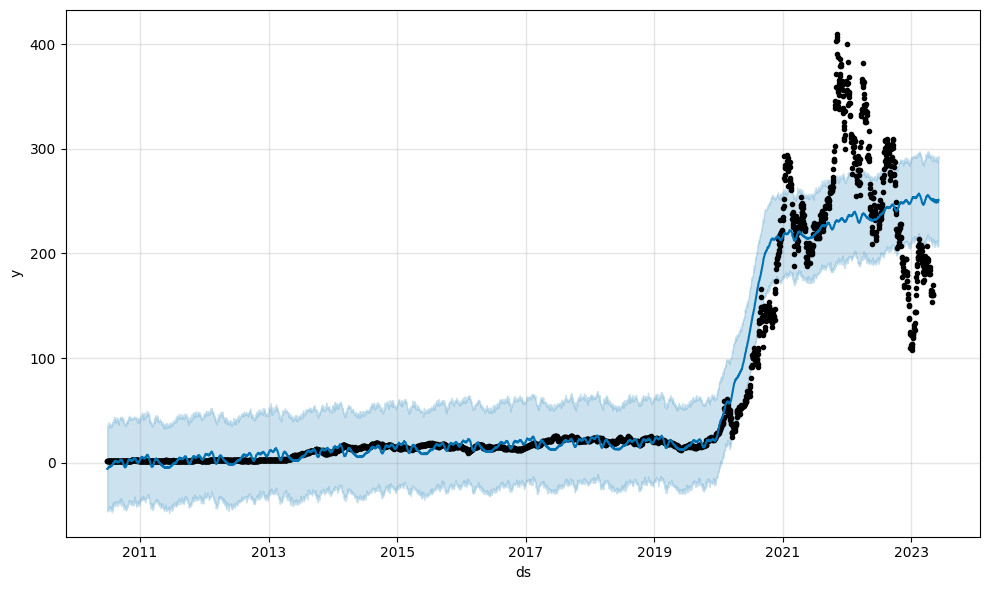

In [99]:
figure=m.plot(forcast, xlabel='ds', ylabel='y')

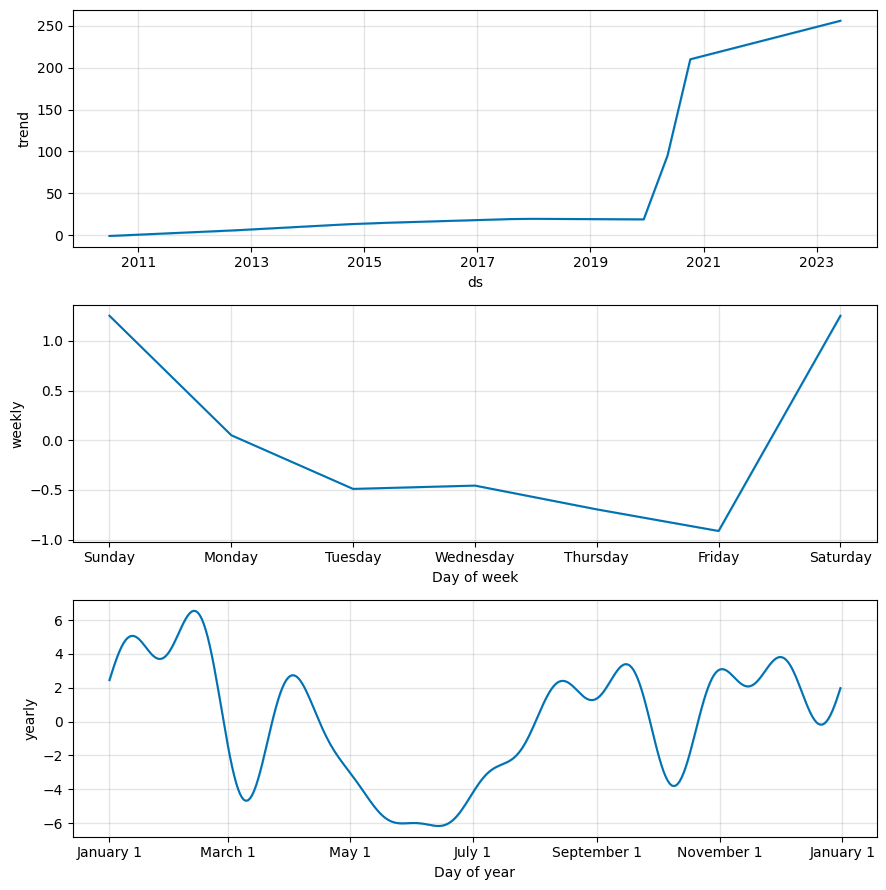

In [100]:
figure2=m.plot_components(forcast)

Through this can download the forcast csv

In [101]:
# from google.colab import files
# forcast.to_csv("forecast.csv")
# files.download("forecast.csv")

# Using SARIMAX for forcasting

In [102]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [103]:
df.set_index('Date', inplace=True)

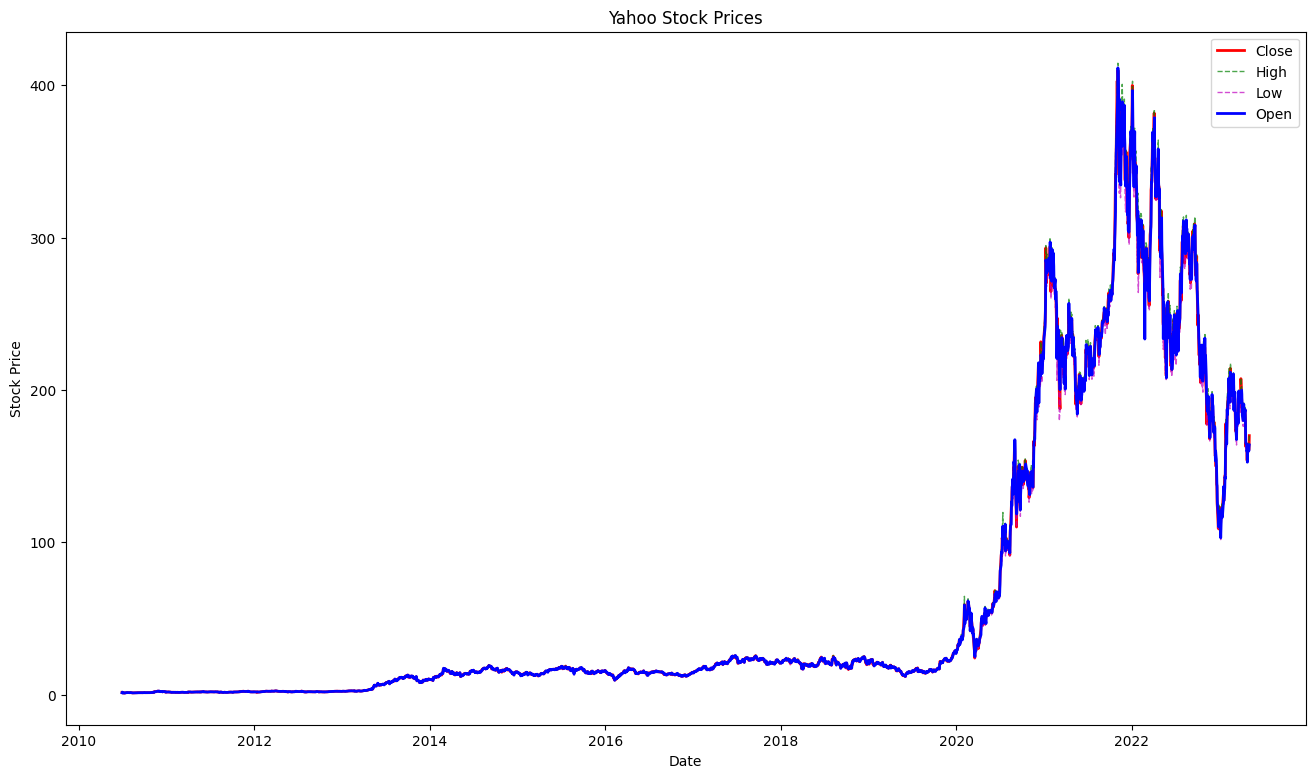

In [104]:
plt.figure(figsize=(16,9))

plt.plot(df.index, df.Close, lw=2, color='r',label='Close')
plt.plot(df.index, df.High, lw=1, color='g',linestyle='--',alpha=0.7,label='High')
plt.plot(df.index, df.Low, lw=1, color='m',linestyle='--',alpha=0.7,label='Low')
plt.plot(df.index, df.Open, lw=2, color='b',label='Open')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Yahoo Stock Prices')
plt.show()

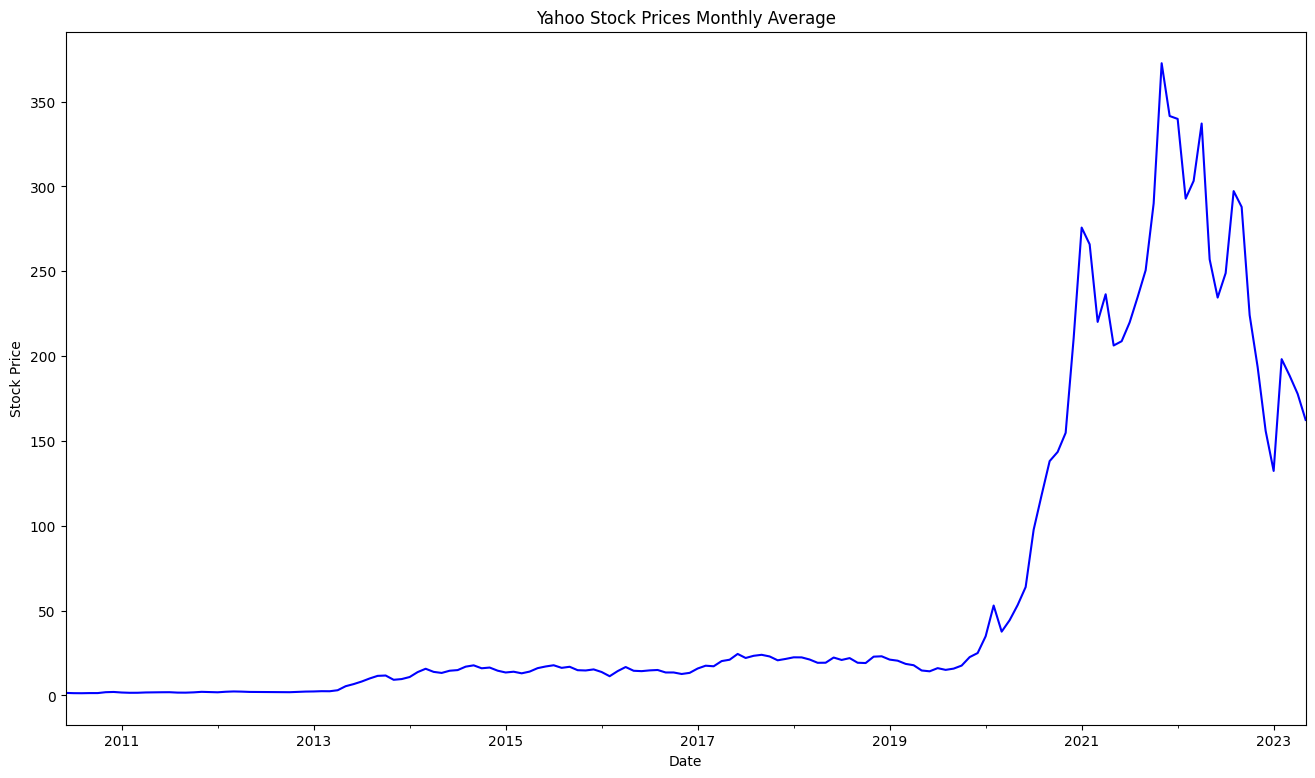

In [105]:
df_open_month_avg = df['Open'].resample('MS').mean()

plt.figure(figsize=(16,9))

df_open_month_avg.plot(color='b')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Yahoo Stock Prices Monthly Average')

plt.show()

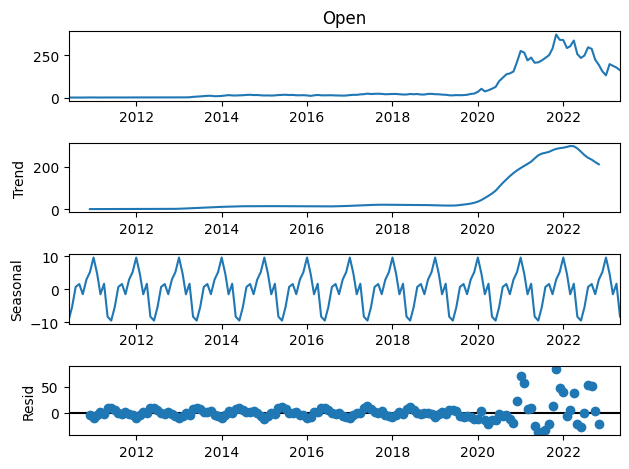

In [106]:
S = seasonal_decompose(df_open_month_avg,model='add')
S.plot()
plt.show()

In [107]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(df_open_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                  -2.225674
p-value                          0.197060
#Lags Used                      11.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -1.483933
p-value                          0.541444
#Lags Used                      14.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64
None


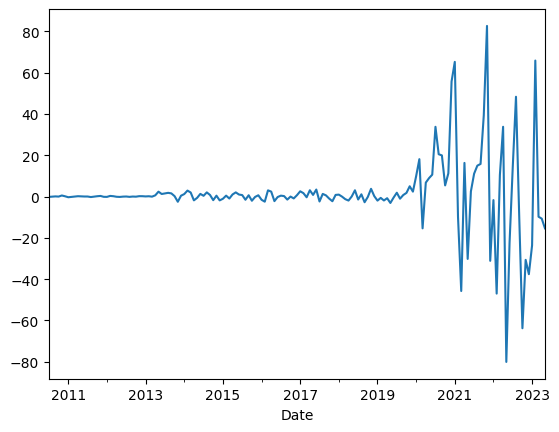

In [108]:
df_open_t_adj = df_open_month_avg - df_open_month_avg.shift(1)
df_open_t_adj = df_open_t_adj.dropna()
df_open_t_adj.plot()

print(adf_test(df_open_t_adj))

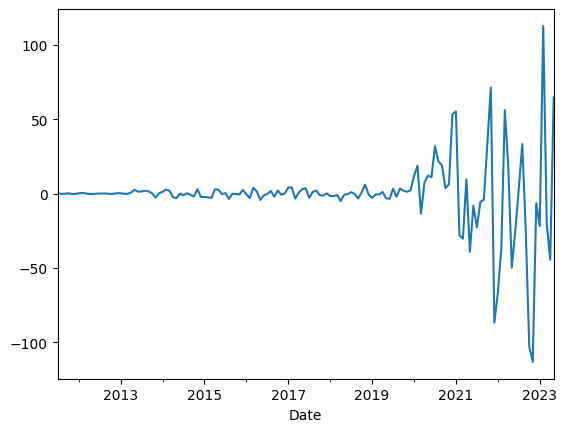

In [109]:
df_open_s_adj = df_open_t_adj - df_open_t_adj.shift(12)
df_open_s_adj = df_open_s_adj.dropna()
df_open_s_adj.plot()
plt.show()

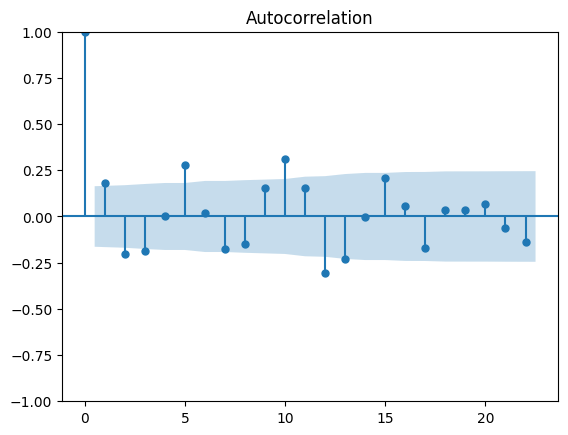

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



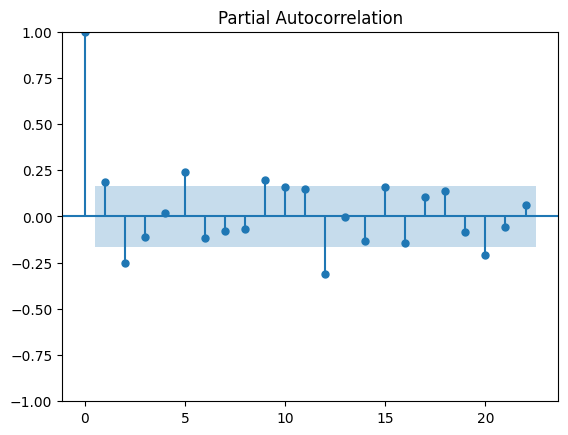

In [110]:
plot_acf(df_open_s_adj)
plt.show()
plot_pacf(df_open_s_adj)
plt.show()

In [111]:
import itertools as itt
import warnings
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itt.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itt.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

params=[]
params_seasonal=[]
AIC = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
         with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            try:
                mod = SARIMAX(df_open_month_avg,
                              order=param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
                results = mod.fit()
                if results.aic > 50:
                    params.append(param)
                    params_seasonal.append(param_seasonal)
                    AIC.append(results.aic)
            
            
            except:
                continue
GS_params = pd.DataFrame(list(zip(params,params_seasonal,AIC)))
Best_params=GS_params.loc[GS_params[2].idxmin()]
print('Best Parameters had been: ARIMA{0}x{1} - AIC:{2}'.format(Best_params[0],Best_params[1],Best_params[2]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)
Best Parameters had been: ARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1009.8775744682379


In [112]:
series_to_pred =df_open_month_avg

y_index = series_to_pred.index

date_train = int(len(y_index)*0.9)

y_train = series_to_pred[y_index[:date_train]]
y_test = series_to_pred[y_index[date_train:len(y_index)]]

series_to_pred = series_to_pred.asfreq('MS')
y_train= y_train.asfreq('MS')
y_test= y_test.asfreq('MS')

y_train.tail()

Date
2021-09-01    250.604284
2021-10-01    289.953491
2021-11-01    372.588890
2021-12-01    341.477726
2022-01-01    339.770000
Freq: MS, Name: Open, dtype: float64

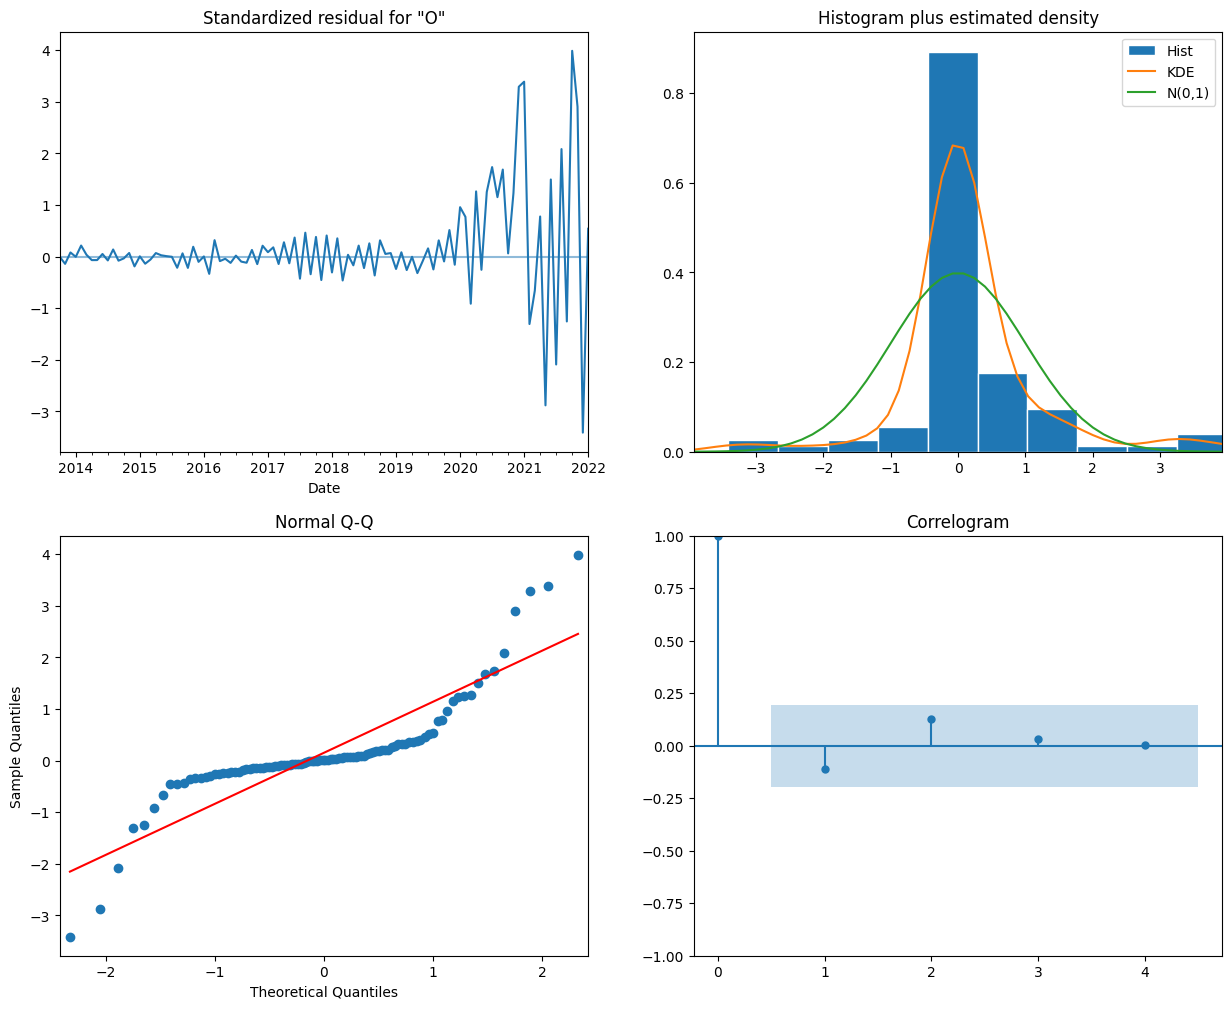

In [113]:
mod = SARIMAX(y_train,
              order = (0,1,2),
              seasonal_order = (0,1,2,12),
              enforce_stationarity = False,
              enforce_invertibility = False)

results = mod.fit()
results.plot_diagnostics(figsize = (15, 12), lags = 4);

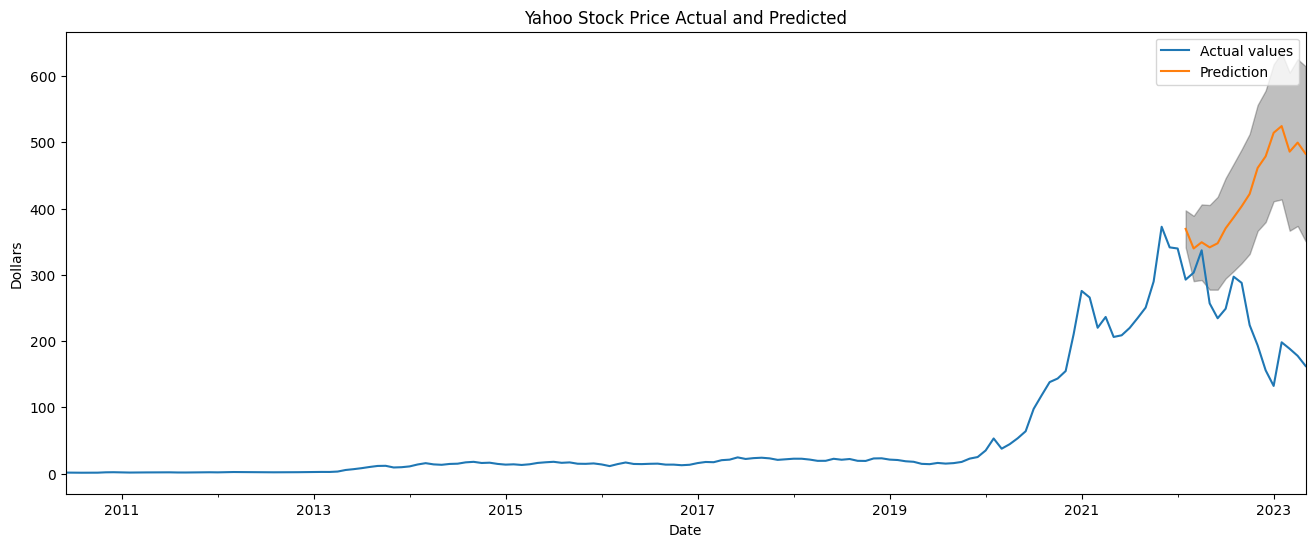

In [114]:
pred_uc = results.get_forecast(steps = len(y_test), dynamic=True)
pred_ci = pred_uc.conf_int()

ax = series_to_pred.plot(label = 'Actual values', figsize = (16, 6))

pred_uc.predicted_mean.plot(ax = ax, label = 'Prediction')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Date')
ax.set_ylabel('Dollars')
ax.set_title('Yahoo Stock Price Actual and Predicted')

plt.legend()
plt.show()

In [115]:
y_pred = pred_ci.iloc[:, 0]
y_test=y_test.fillna(np.mean(y_test))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("The ARIMA model with paremeters {}x{}, has given an rmse in test of {}".format((0,1,2), (0,1,2,12),round(rmse, 2)))

The ARIMA model with paremeters (0, 1, 2)x(0, 1, 2, 12), has given an rmse in test of 143.87


In [116]:
series_to_pred = series_to_pred.asfreq('MS')
mod = SARIMAX(series_to_pred,
              order = (0,1,2),
              seasonal_order = (0,1,2,12),
              enforce_stationarity = False,
              enforce_invertibility = False)

results = mod.fit()

In [117]:
forecast_res = results.get_forecast(steps = 12)
forecast_ci = forecast_res.conf_int()

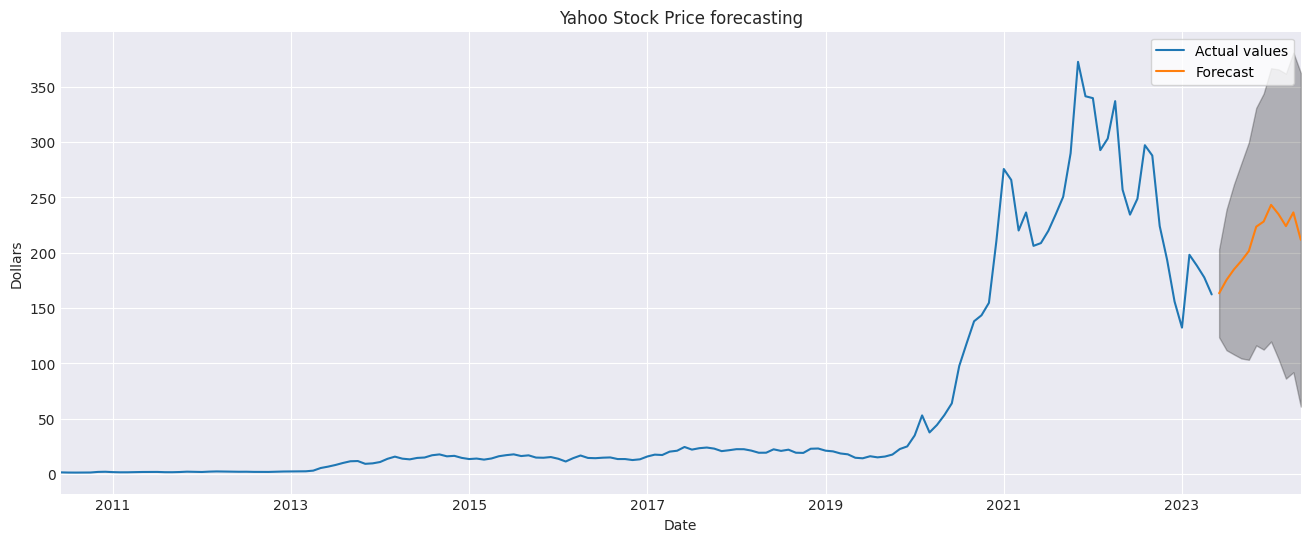

In [118]:
with plt.style.context("seaborn-darkgrid"):

    ax = series_to_pred.plot(label = 'Actual values', figsize = (16, 6))
    
    forecast_res.predicted_mean.plot(ax = ax, label = 'Forecast')

    ax.fill_between(forecast_ci.index,
                    forecast_ci.iloc[:, 0],
                    forecast_ci.iloc[:, 1], color = 'k', alpha = .25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Dollars')


plt.title("Yahoo Stock Price forecasting")
plt.legend()
plt.show()

# Now using LSTM model

In [119]:

d= df.drop(['Volume','Low', 'Dividends', 'Stock Splits'], axis=1)
d.head()

,Open,High,Close
Date,,,
2010-06-29,1.266667,1.666667,1.592667
2010-06-30,1.719333,2.028000,1.588667
2010-07-01,1.666667,1.728000,1.464000
2010-07-02,1.533333,1.540000,1.280000
2010-07-06,1.333333,1.333333,1.074000


In [120]:
dataset = d.values
dataset = dataset.astype('float64')
dataset[:5]

array([[1.26666701, 1.66666698, 1.59266698],
       [1.71933305, 2.02800012, 1.58866704],
       [1.66666698, 1.72800004, 1.46399999],
       [1.53333294, 1.53999996, 1.27999997],
       [1.33333302, 1.33333302, 1.074     ]])

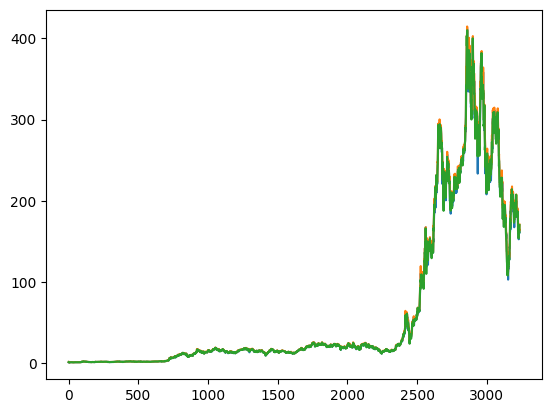

In [121]:
plt.plot(dataset)
plt.show()

In [122]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[:5],'\n')
print(dataset.shape)

[[4.64595078e-04 1.34982138e-03 1.31893362e-03]
 [1.56759864e-03 2.22389882e-03 1.30915180e-03]
 [1.43926814e-03 1.49818819e-03 1.00428027e-03]
 [1.11437537e-03 1.04340943e-03 5.54310805e-04]
 [6.27038990e-04 5.43474885e-04 5.05407544e-05]] 

(3236, 3)


In [123]:
def create_dataset(dataset, n_step_in, n_step_out):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-n_step_in-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+n_step_in),:])
        data_y.append(dataset[i+n_step_in:i+n_step_in+n_step_out,:])
    return np.array(data_x) , np.array(data_y)

In [124]:
train_size = int(len(dataset) * 0.80)
train , test = dataset[0:train_size] , dataset[train_size:len(dataset)]
print(train.shape)
print(test.shape)

(2588, 3)
(648, 3)


In [125]:
n_step_in , n_step_out = 4 , 2 #timestep or look_up

train_x , train_y = create_dataset(train, n_step_in, n_step_out)
test_x , test_y = create_dataset(test, n_step_in, n_step_out)

In [126]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(2583, 4, 3) (2583, 2, 3)
(643, 4, 3) (643, 2, 3)


In [127]:
n_features = train_x.shape[2]
n_features

3

In [128]:
from keras.optimizers import Adam,RMSprop,Adamax
#stack lstm
model = Sequential()
model.add(LSTM(100,activation = 'relu',input_shape=(n_step_in,n_features)))   
model.add(RepeatVector(n_step_out))   
model.add(LSTM(50,activation = 'relu',return_sequences=True))   
model.add(TimeDistributed(Dense(n_features)))
optimizer = Adamax(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='mse')   

In [129]:

#verbose is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing
model.fit(train_x, train_y, epochs=35, shuffle=False, batch_size=2)

Epoch 1/35
1292/1292 [==============================] - 9s 5ms/step - loss: 5.2386e-04
Epoch 2/35
1292/1292 [==============================] - 7s 5ms/step - loss: 0.0011
Epoch 3/35
1292/1292 [==============================] - 7s 5ms/step - loss: 4.4548e-04
Epoch 4/35
1292/1292 [==============================] - 9s 7ms/step - loss: 2.2926e-04
Epoch 5/35
1292/1292 [==============================] - 6s 5ms/step - loss: 1.2113e-04
Epoch 6/35
1292/1292 [==============================] - 7s 5ms/step - loss: 8.2169e-05
Epoch 7/35
1292/1292 [==============================] - 6s 5ms/step - loss: 6.3579e-05
Epoch 8/35
1292/1292 [==============================] - 7s 5ms/step - loss: 5.6168e-05
Epoch 9/35
1292/1292 [==============================] - 6s 5ms/step - loss: 5.3331e-05
Epoch 10/35
1292/1292 [==============================] - 7s 5ms/step - loss: 5.1873e-05
Epoch 11/35
1292/1292 [==============================] - 6s 5ms/step - loss: 5.0456e-05
Epoch 12/35
1292/1292 [======================

In [130]:
model.save('savedata')

In [131]:
# loading model
model = tf.keras.models.load_model('savedata')

In [132]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

21/21 [==============================] - 0s 2ms/step


In [133]:
print('predicted y(train):', predict_train[:2],'\n')
print('real y(train):', train_y[:2])

predicted y(train): [[[0.02160846 0.02315515 0.02480675]
  [0.0257606  0.02709917 0.03085735]]

 [[0.02139379 0.02294805 0.0245828 ]
  [0.02557815 0.02692972 0.03067902]]] 

real y(train): [[[6.27038990e-04 5.43474885e-04 5.05407544e-05]
  [4.22350976e-05 0.00000000e+00 0.00000000e+00]]

 [[4.22350976e-05 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.43528515e-04 2.70634579e-04]]]


In [134]:
print(predict_train.shape)
print(predict_test.shape)
print(train_y.shape)
print(test_y.shape)

(2583, 2, 3)
(643, 2, 3)
(2583, 2, 3)
(643, 2, 3)


In [135]:
predict_train = predict_train.reshape(-1,3)
predict_test = predict_test.reshape(-1,3)
train_y = train_y.reshape(-1,3)
test_y = test_y.reshape(-1,3)

In [136]:
print(predict_train.shape)
print(predict_test.shape)
print(train_y.shape)
print(test_y.shape)

(5166, 3)
(1286, 3)
(5166, 3)
(1286, 3)


In [137]:

predict_train[:2]

array([[0.02160846, 0.02315515, 0.02480675],
       [0.0257606 , 0.02709917, 0.03085735]], dtype=float32)

In [138]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform(train_y)

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform(test_y)

In [139]:
print(predict_train[:5])

[[ 9.943982  10.680728  11.1972275]
 [11.647995  12.311138  13.67142  ]
 [ 9.855884  10.595117  11.105648 ]
 [11.573119  12.241091  13.598497 ]
 [ 9.642643  10.373212  10.874638 ]]


In [140]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
}) 
Answer1.head()

,Predicted,real
0,9.943982,1.333333
1,10.680728,1.333333
2,11.197227,1.074000
3,11.647995,1.093333
4,12.311138,1.108667


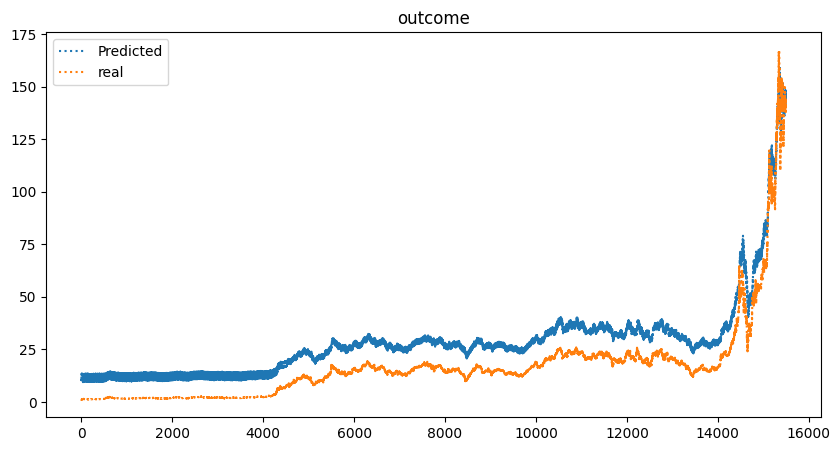

In [141]:
#train
Answer1.plot(title="outcome", figsize=(10,5),linestyle = 'dotted');

In [142]:
Answer2 = pd.DataFrame({
    "Predicted": predict_test.ravel(),
    "real": testy.ravel()
}) 
Answer2.head()

,Predicted,real
0,144.954315,149.926666
1,150.832687,155.300003
2,144.294617,153.766663
3,144.182648,150.103333
4,149.508621,152.190002


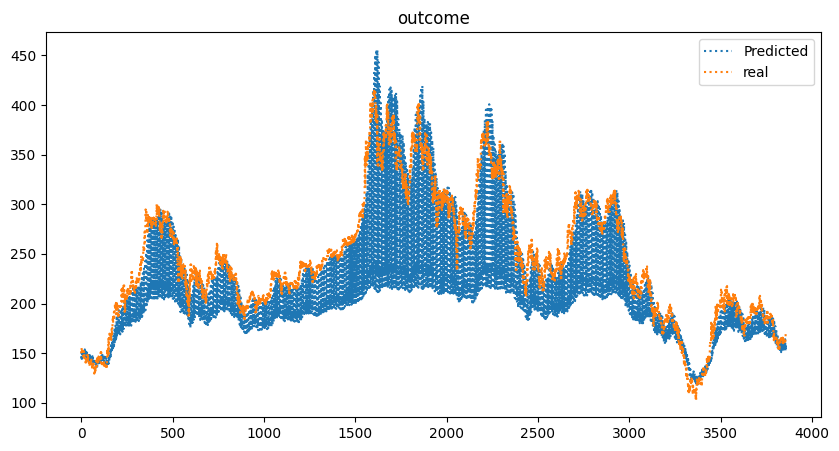

In [143]:
#test
Answer2.plot(title="outcome", figsize=(10,5),linestyle = 'dotted');

# evaluate model

In [144]:
#run anew the cell
n_step_in , n_step_out = 4 , 2 #timestep or look_up

train_x , train_y = create_dataset(train, n_step_in, n_step_out)
test_x , test_y = create_dataset(test, n_step_in, n_step_out)

In [145]:
model.evaluate(test_x, test_y)

21/21 [==============================] - 0s 3ms/step - loss: 0.0135


0.013543149456381798

In [146]:
test_x.shape , test_y.shape

((643, 4, 3), (643, 2, 3))

In [147]:
test_ = array([[0.65318238, 0.60821794, 0.64699902, 0.65896666],
               [0.65318238, 0.60821794, 0.64699902, 0.65896666],
               [0.65318238, 0.60821794, 0.64699902, 0.65896666]])
test_ = test_.reshape(1,n_step_in,n_features)


print(test_.shape,'\n')
print(test_)

(1, 4, 3) 

[[[0.65318238 0.60821794 0.64699902]
  [0.65896666 0.65318238 0.60821794]
  [0.64699902 0.65896666 0.65318238]
  [0.60821794 0.64699902 0.65896666]]]


In [148]:
y_hat = model.predict(test_)
y_hat

1/1 [==============================] - 0s 20ms/step


array([[[0.59783757, 0.6368001 , 0.603029  ],
        [0.4837731 , 0.51277226, 0.50417864]]], dtype=float32)

In [149]:
y_hat = y_hat.reshape(-1,3)

In [150]:
y_hat

array([[0.59783757, 0.6368001 , 0.603029  ],
       [0.4837731 , 0.51277226, 0.50417864]], dtype=float32)

In [151]:
y_hat = scaler.inverse_transform(y_hat)
y_hat

array([[246.42496, 264.3542 , 247.64195],
       [199.61357, 213.08258, 207.2204 ]], dtype=float32)

# Thank you...